In [7]:
from pyrosm import get_data
from pyrosm.data import sources
from pyrosm import OSM

Check if Sheffield is available

In [8]:
# Check cities in great_britain
print("Cities:", sources.cities.available)

Cities: ['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', '

It is, let's download it

In [9]:
fp = get_data("Sheffield", directory="data")
print(fp)

c:\Users\tbalb\Documents\DataScience\pyrosm_hackathon\data\Sheffield.osm.pbf


Read in some points of interest

In [10]:
osm = OSM(fp)

pois_bus_stops = osm.get_pois(custom_filter={"highway":["bus_stop"]})
print(pois_bus_stops.shape)

pois_bus_stops.head()

(4452, 13)


c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


,timestamp,tags,changeset,lon,lat,id,version,highway,lit,name,ref,geometry,osm_type
0,0,"{""bus"":""yes"",""public_transport"":""stop_position""}",0.0,-1.504964,53.363384,27145840,0,bus_stop,None,Psalter Lane/Brincliffe Gardens,None,POINT (-1.50496 53.36338),node
1,0,"{""bus"":""yes"",""public_transport"":""platform""}",0.0,-1.473974,53.374805,70870109,0,bus_stop,None,The Moor / Moorfoot MF7,37023122,POINT (-1.47397 53.37481),node
2,0,"{""bus"":""yes"",""public_transport"":""platform""}",0.0,-1.471355,53.377689,70880471,0,bus_stop,None,Furnival Gate/Moorhead MH2,37023139,POINT (-1.47136 53.37769),node
3,0,"{""bus"":""yes"",""public_transport"":""platform""}",0.0,-1.473859,53.377510,70897011,0,bus_stop,None,Furnival Gate/Moorhead MH5,370023132,POINT (-1.47386 53.37751),node
4,0,"{""bus"":""yes"",""public_transport"":""platform"",""so...",0.0,-1.539804,53.436623,243892927,0,bus_stop,None,None,None,POINT (-1.53980 53.43662),node


Let's plot those and hope for the best

<AxesSubplot: >

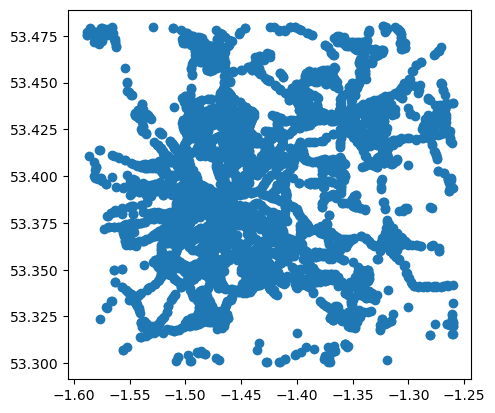

In [11]:
pois_bus_stops.plot()

Let's look at whether the bus transit network would be better than individual stops.

In [12]:
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "tram"]
rails = ["tramway", "light_rail", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)
transit = transit.to_crs("EPSG:27700")

transit.head()

c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,bicycle,bus,foot,railway,tracks,tram,name,ref,public_transport,id,...,geometry,from,network,route,to,type,opening_hours,operator,website,changeset
0,None,None,None,tram,1,None,None,None,None,9355661,...,"MULTILINESTRING ((436002.456 387480.897, 43599...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,yes,None,None,None,None,Meadowhall Bus Station,None,station,42029167,...,"POLYGON ((439122.301 391246.419, 439123.486 39...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,yes,yes,yes,None,None,None,None,None,None,42030893,...,"MULTILINESTRING ((435799.508 387109.114, 43579...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,tram,1,None,None,None,None,88513205,...,"MULTILINESTRING ((439162.252 391380.935, 43915...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,tram,1,None,None,None,None,93168212,...,"MULTILINESTRING ((437063.734 387743.305, 43707...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

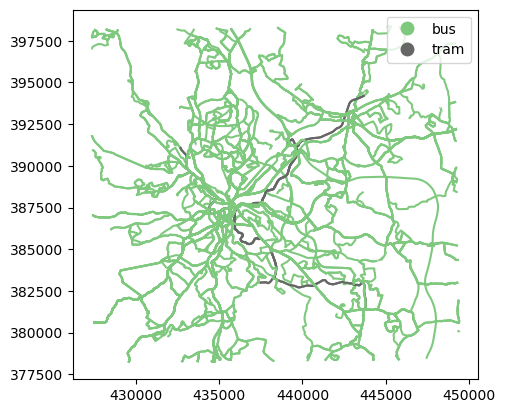

In [13]:
transit['route'].unique()
transit = transit.dropna(subset='route')
transit['route'].unique()

transit.plot(column='route',cmap='Accent',legend=True)

c:\Users\tbalb\anaconda3\envs\pyrosm_hackathon\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


['Polygon' 'MultiLineString' 'LineString' 'MultiPolygon']
['Polygon' 'MultiPolygon']


<AxesSubplot: >

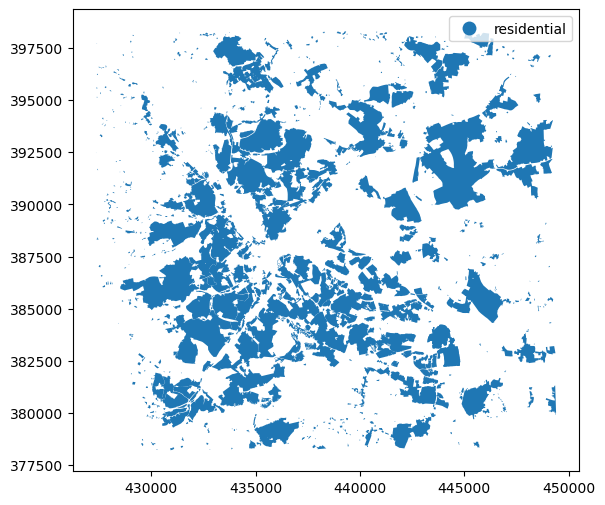

In [14]:
landuse=osm.get_data_by_custom_criteria(custom_filter={'landuse':['residential']},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)

landuse = landuse.to_crs("EPSG:27700")

print(landuse['geometry'].geom_type.unique())
landuse = landuse.loc[(landuse['geometry'].geom_type == "Polygon") | (landuse['geometry'].geom_type == "MultiPolygon")]
print(landuse['geometry'].geom_type.unique())
landuse.plot(column='landuse', legend=True, figsize=(10,6))

<AxesSubplot: >

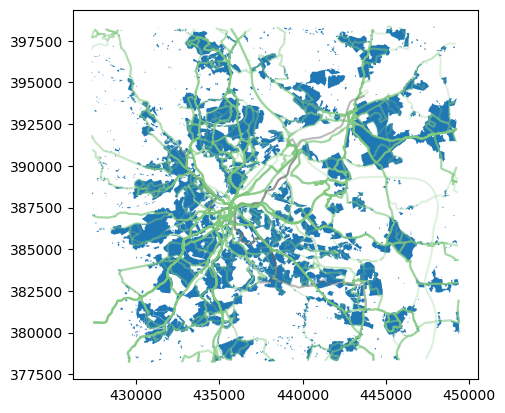

In [15]:
#Plot public transport network and residential landuse together
ax = transit.plot(column='route', cmap='Accent',alpha=.25)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
landuse.plot(ax=ax,column='landuse', figsize=(15,10))  # passing the first plot as an axis to the second
#transit.plot(ax=ax, column='route', cmap='Accent', linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

Let's look at buffering some routes by reasonable walking distance

In [16]:
transit_buffered = transit.copy(deep=True)
transit_buffered['geometry'] = transit.buffer(1000)
transit_buffered['geometry'].geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

<AxesSubplot: >

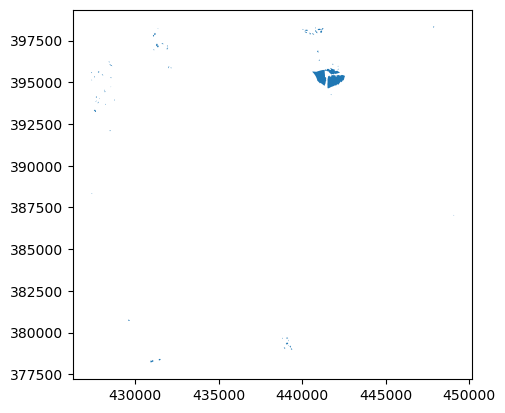

In [17]:
residential_outside_1km = landuse.overlay(transit_buffered,how='difference')
residential_outside_1km.plot()

In [18]:
residential_outside_1km

,construction,landuse,residential,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,residential,None,24296546,0,-1,None,way,"POLYGON ((440653.483 395646.739, 440848.182 39...",NaN
1,None,residential,None,24296549,0,-1,None,way,"POLYGON ((442009.667 395507.053, 441971.502 39...",NaN
2,None,residential,None,162424667,0,-1,"{""source"":""Bing""}",way,"POLYGON ((427447.873 388309.104, 427438.227 38...",NaN
3,None,residential,None,278495191,0,-1,None,way,"POLYGON ((431060.774 397740.184, 431063.673 39...",NaN
4,None,residential,None,278502098,0,-1,None,way,"POLYGON ((431099.942 396984.354, 431109.553 39...",NaN
...,...,...,...,...,...,...,...,...,...,...
60,None,residential,None,334571118,0,-1,None,way,"POLYGON ((439244.119 379181.951, 439285.287 37...",NaN
61,None,residential,None,334571124,0,-1,"{""name"":""Troway Hill Farm""}",way,"POLYGON ((439390.981 378989.525, 439381.570 37...",NaN
62,None,residential,None,334573928,0,-1,"{""name"":""Snowdon Farm""}",way,"POLYGON ((438981.029 379096.305, 438973.276 37...",NaN
63,None,residential,None,661454077,0,-1,None,way,"POLYGON ((431389.447 397156.039, 431409.471 39...",NaN


EPSG:27700


<AxesSubplot: >

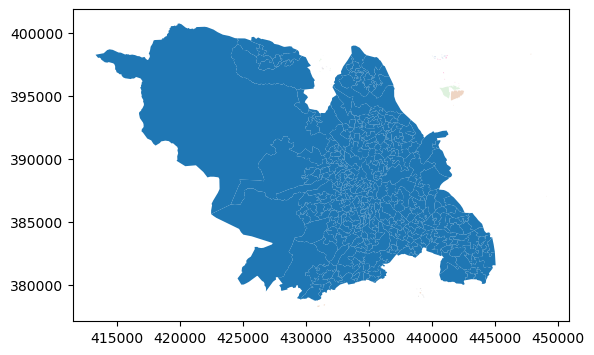

In [21]:
import geopandas as gpd

imd = gpd.read_file("data/imd_shp/Indices_of_Multiple_Deprivation_(IMD)_2019.shp").to_crs("EPSG:27700")
print(imd.crs)

imd_sheffield = imd.loc[imd['LSOA01NM'].str.contains("Sheffield")]


#Plot imd and residential outside network together
ax = residential_outside_1km.plot(cmap='Accent',alpha=.25)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
imd_sheffield.plot(ax=ax, figsize=(15,10))  # passing the first plot as an axis to the second

Looks like 'Sheffield' from the OSM data and 'Sheffield' from the official statistics shapefile don't quite align.  I could either use a bounding box based on the cut I have from OSM or just perform the intersection on the entire IMD dataset.  I suspect the ideal solution would be the bounding box, but I'm not sure how long it'll take to do so I might just try to get a rough output from the whole dataset and then look at refining later.

In [23]:
imd_residential_outside_1km = imd.overlay(residential_outside_1km,how='intersection')
imd_residential_outside_1km

,FID,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rank,IMD_Decile,LSOA01NM,LADcd,...,construction,landuse,residential,id,timestamp,version,tags,osm_type,changeset,geometry
0,6027,E01007421,Barnsley 027A,Barnsley 027A,2.815208e+07,35206.644175,17966,6,Barnsley 027A,E08000016,...,None,residential,None,278495191,0,-1,None,way,NaN,"POLYGON ((431063.673 397777.975, 431061.024 39..."
1,6027,E01007421,Barnsley 027A,Barnsley 027A,2.815208e+07,35206.644175,17966,6,Barnsley 027A,E08000016,...,None,residential,None,278502098,0,-1,None,way,NaN,"POLYGON ((431109.553 396977.463, 431126.551 39..."
2,6027,E01007421,Barnsley 027A,Barnsley 027A,2.815208e+07,35206.644175,17966,6,Barnsley 027A,E08000016,...,None,residential,None,278504175,0,-1,None,way,NaN,"POLYGON ((432039.225 395938.548, 432003.371 39..."
3,6027,E01007421,Barnsley 027A,Barnsley 027A,2.815208e+07,35206.644175,17966,6,Barnsley 027A,E08000016,...,None,residential,None,278504179,0,-1,None,way,NaN,"POLYGON ((432144.232 395841.005, 432146.891 39..."
4,6730,E01008135,Sheffield 005C,Sheffield 005C,5.581899e+06,19033.307956,19718,7,Sheffield 005C,E08000019,...,None,residential,None,278504179,0,-1,None,way,NaN,"POLYGON ((432144.232 395841.005, 432175.637 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,18869,E01019816,North East Derbyshire 002D,North East Derbyshire 002D,1.539758e+07,19943.344239,17135,6,North East Derbyshire 002D,E07000038,...,None,residential,None,334488268,0,-1,None,way,NaN,"POLYGON ((439055.710 379642.157, 439056.343 37..."
69,18869,E01019816,North East Derbyshire 002D,North East Derbyshire 002D,1.539758e+07,19943.344239,17135,6,North East Derbyshire 002D,E07000038,...,None,residential,None,334571116,0,-1,None,way,NaN,"POLYGON ((439206.641 379216.968, 439186.374 37..."
70,18869,E01019816,North East Derbyshire 002D,North East Derbyshire 002D,1.539758e+07,19943.344239,17135,6,North East Derbyshire 002D,E07000038,...,None,residential,None,334571118,0,-1,None,way,NaN,"POLYGON ((439285.287 379223.464, 439292.680 37..."
71,18869,E01019816,North East Derbyshire 002D,North East Derbyshire 002D,1.539758e+07,19943.344239,17135,6,North East Derbyshire 002D,E07000038,...,None,residential,None,334571124,0,-1,"{""name"":""Troway Hill Farm""}",way,NaN,"POLYGON ((439381.570 378987.334, 439369.050 37..."


Well that worked super quick so no problems with performance.  Looks like many of the 'Sheffield' based landuse polygons fall outside the official Sheffield Local Authority region but that's ok for our purposes as there's a lot of work going on to improve the transport network across the south yorkshire region (indeed the authority is Travel South Yorkshire).

Let's have a look at some of those areas on a plot.

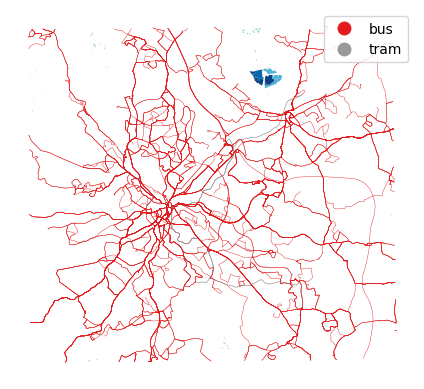

In [46]:
#Plot imd and transport network together
imd_ax = imd_residential_outside_1km.plot(column="IMD_Decile", legend=True,categorical=True, cmap="GnBu_r")  # saving the first plot as an axis
transit_ax = transit.plot(ax=imd_ax, column="route", figsize=(15,10),linewidth=.3, cmap="Set1",legend=True)  # passing the first plot as an axis to the second


transit_ax.set_axis_off();

Although not the prettiest, it's cool to see the residential areas from the IMD dataset compared to the transport network

            IMD_Decile        per
IMD_Decile                       
1                    5   6.849315
2                    3   4.109589
3                    1   1.369863
4                    7   9.589041
5                   12  16.438356
6                   20  27.397260
7                   21  28.767123
8                    3   4.109589
9                    1   1.369863


<AxesSubplot: xlabel='IMD_Decile'>

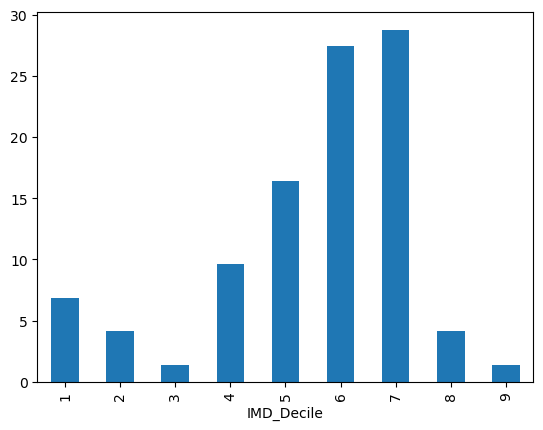

In [74]:
total_rows = len(imd_residential_outside_1km)
sum_stats = imd_residential_outside_1km.groupby("IMD_Decile")["IMD_Decile"].count().to_frame()
sum_stats['per'] = (sum_stats/total_rows)*100
print(sum_stats)
sum_stats['per'].plot(kind="bar")
